<a href="https://colab.research.google.com/github/ilapro53/skillbox_ml_hw_4sm/blob/main/homework2.8/Homework_%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%86%D0%B8%D0%B8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные концепции Machine Learning. Домашняя работа

## Чтение и визуализация данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('phones.csv')
df.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [ ]:
df.shape

(100, 4)

In [ ]:
df.dtypes

disk      int64
os       object
price     int64
year      int64
dtype: object

In [ ]:
sorted(df['disk'].unique())

[16, 32, 64, 128, 256, 512]

In [ ]:
df['os'].unique()

array(['Android', 'iOS'], dtype=object)

In [ ]:
sorted(df['year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

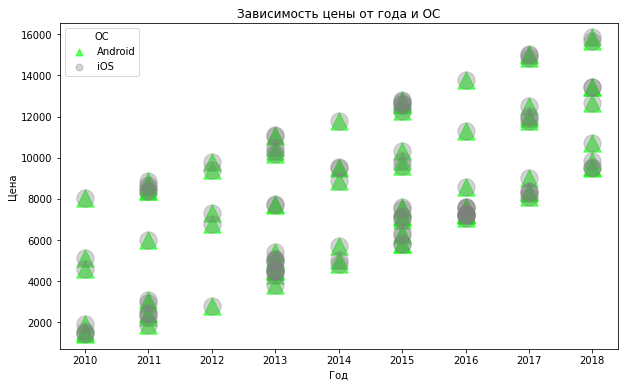

In [ ]:
params = {
    'Android': 
      {'color': 'lime', 'marker': '^', 'alpha': 0.6},
    'iOS': 
      {'color': 'gray', 'marker': 'o', 'alpha': 0.35}, 
}
fig, ax = plt.subplots(figsize=(10, 6))
for os in params:
    color = params[os]['color']
    marker = params[os]['marker']
    alpha = params[os]['alpha']

    data = df[df['os'] == os]
    ax.scatter(
        x=df['year'], y=df['price'], c=color, 
        label=os, 
        alpha=alpha, 
        marker=marker,
        s=300)

ax.legend(loc='upper left', title="ОС", markerscale=0.4)
plt.title("Зависимость цены от года и ОС")
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

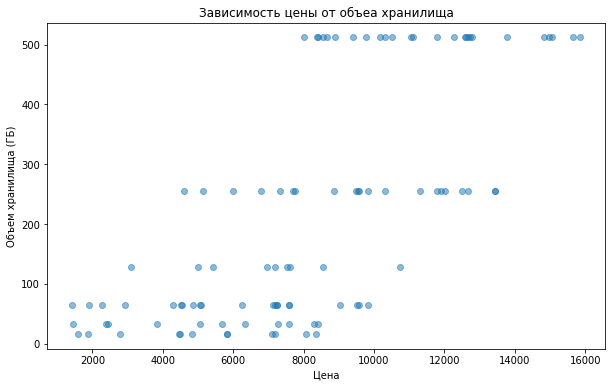

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['price'], y=df['disk'], alpha=0.5)
plt.title("Зависимость цены от объеа хранилища")
plt.xlabel('Цена')
plt.ylabel('Объем хранилища (ГБ)')
plt.show()

## Обучение

### Задание 1: обучить модель регрессии
Целевая переменная: 'price'

In [ ]:
transformed_df = df.copy()

In [ ]:
# Преобразуем категориальные фичи с помощью OneHotEncoder
encode_features = ['os']
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(transformed_df[encode_features])
ohe_transformed = ohe.transform(transformed_df[encode_features])
transformed_df[ohe.get_feature_names_out()] = ohe_transformed
transformed_df = transformed_df.drop(encode_features, axis=1)

transformed_df.head()

,disk,price,year,os_Android,os_iOS
0,64,7256,2016,1.0,0.0
1,128,7623,2015,1.0,0.0
2,64,1916,2010,1.0,0.0
3,512,15045,2017,0.0,1.0
4,16,4478,2013,1.0,0.0


In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
test_size = 10
target_1 = 'price'

X = transformed_df.drop([target_1], axis=1)[:-test_size]
y = transformed_df[target_1][:-test_size]

In [ ]:
lr = LinearRegression()
lr.fit(X, y);

In [ ]:
test = transformed_df.head(test_size)
test

,disk,price,year,os_Android,os_iOS
0,64,7256,2016,1.0,0.0
1,128,7623,2015,1.0,0.0
2,64,1916,2010,1.0,0.0
3,512,15045,2017,0.0,1.0
4,16,4478,2013,1.0,0.0
5,512,15842,2018,0.0,1.0
6,128,7191,2015,1.0,0.0
7,64,4277,2013,1.0,0.0
8,512,12797,2015,0.0,1.0
9,64,6256,2015,1.0,0.0


In [ ]:
prediction = lr.predict(test.drop(target_1, axis=1))
prediction

array([ 7653.71678447,  7318.13013469,  1590.61980747, 14722.3616327 ,
        4115.97116118, 15732.87779554,  7318.13013469,  4622.16829597,
       12701.32930704,  6643.20062163])

In [ ]:
print('Ошибки на тестах:')
abs(1 - prediction/test[target_1])

Ошибки на тестах:


0    0.054812
1    0.039993
2    0.169823
3    0.021445
4    0.080846
5    0.006888
6    0.017679
7    0.080703
8    0.007476
9    0.061893
Name: price, dtype: float64

In [ ]:
print('Средняя ошибка на тестах:')
abs(1 - prediction/test[target_1]).mean()

Средняя ошибка на тестах:


0.0541558480727379

### Задание 2: обучить модель классификации
Целевая переменная: 'year'

In [ ]:
transformed_df = df.copy()

In [ ]:
# Преобразуем категориальные фичи с помощью OneHotEncoder
encode_features = ['os', 'disk']
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(transformed_df[encode_features])
ohe_transformed = ohe.transform(transformed_df[encode_features])
transformed_df[ohe.get_feature_names_out()] = ohe_transformed
transformed_df = transformed_df.drop(encode_features, axis=1)

transformed_df.head()

,price,year,os_Android,os_iOS,disk_16,disk_32,disk_64,disk_128,disk_256,disk_512
0,7256,2016,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7623,2015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1916,2010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,15045,2017,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4478,2013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
test_size = 10
target_2 = 'year'

X = transformed_df.drop([target_2], axis=1)[:-test_size]
y = transformed_df[target_2][:-test_size]

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y);

In [ ]:
test = transformed_df.head(test_size)
test

,price,year,os_Android,os_iOS,disk_16,disk_32,disk_64,disk_128,disk_256,disk_512
0,7256,2016,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7623,2015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1916,2010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,15045,2017,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4478,2013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,15842,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7191,2015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,4277,2013,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,12797,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,6256,2015,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
prediction = clf.predict(test.drop(target_2, axis=1))
prediction

array([2016, 2015, 2010, 2017, 2013, 2018, 2015, 2013, 2015, 2015])

In [ ]:
print('Точность тестов:')
test['year'] == prediction

Точность тестов:


0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: year, dtype: bool

In [ ]:
print('Средняя точность тестов:')
(test['year'] == prediction).mean()

Средняя точность тестов:


1.0

### Задание 3: обучить модель кластеризации

In [ ]:
transformed_df = df.copy()

In [ ]:
# Преобразуем категориальные фичи с помощью OneHotEncoder
encode_features = ['os']
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(transformed_df[encode_features])
ohe_transformed = ohe.transform(transformed_df[encode_features])
transformed_df[ohe.get_feature_names_out()] = ohe_transformed
transformed_df = transformed_df.drop(encode_features, axis=1)

transformed_df.head()

,disk,price,year,os_Android,os_iOS
0,64,7256,2016,1.0,0.0
1,128,7623,2015,1.0,0.0
2,64,1916,2010,1.0,0.0
3,512,15045,2017,0.0,1.0
4,16,4478,2013,1.0,0.0


In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = transformed_df

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X);

In [ ]:
prediction = kmeans.predict(transformed_df)
prediction

array([3, 3, 1, 2, 1, 2, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 2, 3, 2, 2, 1, 1,
       0, 0, 0, 3, 3, 0, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3,
       3, 3, 0, 1, 0, 2, 0, 3, 1, 1, 3, 3, 1, 2, 0, 2, 0, 1, 1, 3, 1, 0,
       3, 1, 1, 2, 0, 0, 3, 3, 2, 1, 3, 3, 3, 0, 1, 1, 1, 0, 3, 1, 0, 0,
       2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0], dtype=int32)

In [ ]:
df_clusterised = df.copy()
df_clusterised['cluster'] = prediction
df_clusterised

,disk,os,price,year,cluster
0,64,Android,7256,2016,3
1,128,Android,7623,2015,3
2,64,Android,1916,2010,1
3,512,iOS,15045,2017,2
4,16,Android,4478,2013,1
...,...,...,...,...,...
95,512,iOS,8398,2011,3
96,64,Android,7197,2016,3
97,32,Android,5694,2014,3
98,32,Android,7589,2016,3


In [ ]:
clusters = sorted(df_clusterised.cluster.unique())
clusters

[0, 1, 2, 3]

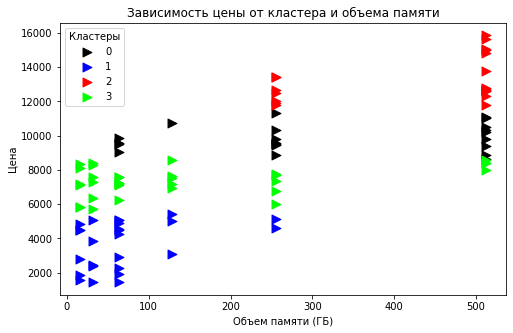

In [ ]:
params = dict(
    zip(
          clusters, 
          [
              {'color': 'black'},
              {'color': 'blue'},
              {'color': 'red'},
              {'color': 'lime'},
          ]
        )
    )

fig, ax = plt.subplots(figsize=(8, 5))


for cluster in clusters:
  x=df_clusterised[df_clusterised.cluster == cluster]['disk']
  y=df_clusterised[df_clusterised.cluster == cluster]['price']
  z=df_clusterised[df_clusterised.cluster == cluster]['cluster']

  color = params[cluster]['color']

  ax.scatter(x, y, s=80, marker=">", color=color, label=cluster)

ax.legend(loc='upper left', title="Кластеры")
ax.set_title("Зависимость цены от кластера и объема памяти")
ax.set_xlabel('Объем памяти (ГБ)')
ax.set_ylabel('Цена')
plt.show()